# **Do Ly Anh Kiet - 2274802010451**


---



# **Pytorch**

In [1]:
import torch

if torch.cuda.is_available():
    device_index = torch.cuda.current_device()
    device_name = torch.cuda.get_device_name(device_index)
    memory_allocated = torch.cuda.memory_allocated()

    print(f"Current GPU Device Index: {device_index}")
    print(f"GPU Device Name: {device_name}")
    print(f"GPU Memory Allocated (before tensor creation): {memory_allocated} bytes")

    device = torch.device("cuda")
    tensor = torch.randn(1024, 1024, device=device)
    memory_allocated = torch.cuda.memory_allocated()
    print(f"GPU Memory Allocated (after tensor creation): {memory_allocated} bytes")

    del tensor
    memory_allocated_after = torch.cuda.memory_allocated()
    print(f"GPU Memory Allocated (after tensor deletion): {memory_allocated_after} bytes")
else:
    print("CUDA is not available. Please ensure you have a compatible GPU and drivers installed.")

Current GPU Device Index: 0
GPU Device Name: Tesla T4
GPU Memory Allocated (before tensor creation): 0 bytes
GPU Memory Allocated (after tensor creation): 4194304 bytes
GPU Memory Allocated (after tensor deletion): 0 bytes


#**DATASET WITH PYTHON**

In [2]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Iris.csv')

# In 5 dòng đầu tiên của dữ liệu
print("5 dòng đầu tiên của dữ liệu:")
print(df.head())

# In số dòng và cột của dữ liệu
print("\nSố dòng và cột của dữ liệu:")
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")

5 dòng đầu tiên của dữ liệu:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Số dòng và cột của dữ liệu:
Số dòng: 150
Số cột: 6


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import numpy as np

le = LabelEncoder()

# Loại bỏ cột 'Id' nếu nó tồn tại
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Chia dữ liệu
X = df.drop(columns=['Species'])  # Giữ lại các đặc trưng
y = le.fit_transform(df['Species'])  # Mã hóa nhãn thành số nguyên

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển đổi DataFrame sang Tensor
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

# Không dùng .values vì y_train đã là numpy array
y_train = torch.LongTensor(y_train).reshape(-1, 1)
y_test = torch.LongTensor(y_test).reshape(-1, 1)

# Kiểm tra kích thước dữ liệu
print(f"Train size: {len(y_train)}")

# Đếm số lượng mẫu theo từng class
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)


Train size: 120
[0 1 2] [40 41 39]


In [8]:
import torch
import sympy

x_sym = sympy.Symbol('x', real=True)

# Định nghĩa hàm y
y_sym = 2*x_sym**4 + x_sym**3 + 3*x_sym**2 + 5*x_sym + 1
# Tính đạo hàm
y_prime_sym = sympy.diff(y_sym, x_sym)
print("Biểu thức đạo hàm của y:", y_prime_sym)

x_torch = torch.tensor(2.0, requires_grad=True)
y_torch = 2*x_torch**4 + x_torch**3 + 3*x_torch**2 + 5*x_torch + 1
y_torch.backward()
print(f"Giá trị đạo hàm f'(2) =", x_torch.grad.item())


Biểu thức đạo hàm của y: 8*x**3 + 3*x**2 + 6*x + 5
Giá trị đạo hàm f'(2) = 93.0


In [9]:
import sympy

x = sympy.Symbol('x', real=True)
y = 5*x**6 + 5*x**4 + 3*x**3 + 5*x + 1
y_prime = sympy.diff(y, x)
print("Biểu thức đạo hàm:", y_prime)
slope_at_2 = y_prime.subs(x, 2)
print("Độ dốc tại x=2:", slope_at_2)

Biểu thức đạo hàm: 30*x**5 + 20*x**3 + 9*x**2 + 5
Độ dốc tại x=2: 1161


In [16]:
# BTVN1:
# Tạo một tensor x có giá trị ban đầu 2.0
# đn hàm số và tính np.gradient
# y = x^3 + 2x^2 +5x+1 hãy tính dy/dx tại giá trị của x.
#Dùng phương pháp gradient descent với learning rate alpha = 0.1 để cập nhật giá trị x trong 10 vòng lặp và in ra kết quả

#BTVN2:
# Tạo một tập dữ liệu giả lập với x là số giờ học ngẫu nhiên từ 1 - 10 và y số điểm được tính theo công thức y=3x+5+noise.
# Với noise là một giá trị ngẫu nhiên nhỏ
# 1. khởi tạo tham số w và b ngẫu nhiên với requires_gradient = true
# 2. tính Mse
# 3. tính np.gradient
# 4. cập nhật tham số w và b = gradient descent với learning rate aplha = 0.01
# 5. lặp lại quá trình trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình
# 6. biểu đồ



---


# Bài Tập Về Nhà
## BTVN1:
- **Mục tiêu:**  
  - Tạo một tensor `x` có giá trị ban đầu là 2.0.  
  - Định nghĩa hàm số: [ y = x^3 + 2x^2 + 5x + 1 ]
  - Tính đạo hàm {dy}{dx} tại giá trị của `x` bằng hai cách:
    1. Sử dụng tính toán tự động gradient của PyTorch.
    2. Ước lượng bằng `np.gradient` trên một dãy giá trị x gần 2.0.
  - Dùng phương pháp gradient descent với learning rate \(\alpha = 0.1\) để cập nhật `x` trong 10 vòng lặp và in ra kết quả.

## BTVN2:
- **Mục tiêu:**  
  - Tạo tập dữ liệu giả lập với:
    - `x`: số giờ học ngẫu nhiên trong khoảng [1, 10].
    - `y`: số điểm tính theo công thức \( y = 3x + 5 + noise \) với noise là nhiễu nhỏ.
  - Khởi tạo tham số `w` và `b` ngẫu nhiên với `requires_grad=True`.
  - Xây dựng mô hình hồi quy tuyến tính, tính hàm mất mát (MSE) và cập nhật tham số theo gradient descent với learning rate \(\alpha = 0.01\) trong 100 vòng lặp.
  - Biểu đồ quá trình hội tụ của hàm mất mát được vẽ ra.


In [14]:
import torch
import numpy as np
import pandas as pd
from tabulate import tabulate

print("=== BTVN1: Sử dụng PyTorch (autograd) ===")

x = torch.tensor(2.0, requires_grad=True)
alpha = 0.1  # lr

# Tạo một mảng các giá trị x xung quanh 2.0 (từ 1.9 đến 2.1)
x_array = np.linspace(1.9, 2.1, 50)

# Tính giá trị hàm số tại các điểm trong mảng
y_array = x_array**3 + 2*x_array**2 + 5*x_array + 1

# Tính gradient bằng np.gradient, sử dụng khoảng cách của x_array
grad_np = np.gradient(y_array, x_array)

# Lấy giá trị gradient gần nhất với x = 2.0
idx = np.abs(x_array - 2.0).argmin()
print(f"Tại x = 2.0, np.gradient cho kết quả: grad ≈ {grad_np[idx]:.4f}")

# Danh sách lưu kết quả từng vòng lặp để tạo bảng output
records = []
for i in range(10):
    # Tính hàm số: y = x^3 + 2x^2 + 5x + 1
    y = x**3 + 2*x**2 + 5*x + 1
    if x.grad is not None: x.grad.zero_()

    # Tính gradient tự động: dy/dx
    y.backward()

    # Lấy giá trị gradient tại x hiện tại
    grad_x = x.grad.item()

    # Lưu lại kết quả của vòng lặp vào danh sách
    records.append({
        "Iter": i,
        "x": x.item(),
        "y": y.item(),
        "grad": grad_x
    })

    # In ra kết quả của vòng lặp hiện tại
    print(f"Iter {i}: x = {x.item():.4f}, y = {y.item():.4f}, grad = {grad_x:.4f}")

    # Cập nhật x theo công thức: x = x - alpha * grad
    with torch.no_grad():
        x -= alpha * x.grad

# Tạo bảng output
df = pd.DataFrame(records)

print("\nBảng kết quả từng vòng lặp (sử dụng tabulate):")
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

=== BTVN1: Sử dụng PyTorch (autograd) ===
Tại x = 2.0, np.gradient cho kết quả: grad ≈ 25.0327
Iter 0: x = 2.0000, y = 27.0000, grad = 25.0000
Iter 1: x = -0.5000, y = -1.1250, grad = 3.7500
Iter 2: x = -0.8750, y = -2.5137, grad = 3.7969
Iter 3: x = -1.2547, y = -4.1001, grad = 4.7040
Iter 4: x = -1.7251, y = -6.8073, grad = 7.0274
Iter 5: x = -2.4278, y = -13.6609, grad = 12.9717
Iter 6: x = -3.7250, y = -41.5604, grad = 31.7268
Iter 7: x = -6.8977, y = -266.5102, grad = 120.1433
Iter 8: x = -18.9120, y = -6142.3750, grad = 1002.3439
Iter 9: x = -119.1464, y = -1663589.5000, grad = 42116.0117

Bảng kết quả từng vòng lặp (sử dụng tabulate):
+--------+------------+-----------------+-------------+
|   Iter |          x |               y |        grad |
|--------+------------+-----------------+-------------|
|      0 |    2       |    27           |    25       |
|      1 |   -0.5     |    -1.125       |     3.75    |
|      2 |   -0.875   |    -2.51367     |     3.79688 |
|      3 |   -

,Epoch,Loss,w,b
0,0,282.915436,1.133350,-0.301185
10,10,3.433275,3.695549,0.218669
20,20,3.238065,3.675335,0.357016
30,30,3.053980,3.655707,0.491362
40,40,2.880388,3.636647,0.621823
50,50,2.716692,3.618137,0.748511
60,60,2.562325,3.600163,0.871536
70,70,2.416758,3.582708,0.991002
80,80,2.279490,3.565758,1.107014
90,90,2.150045,3.549299,1.219672


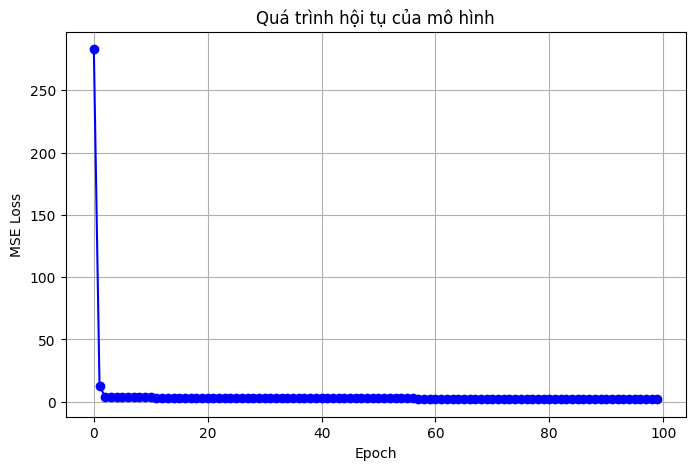

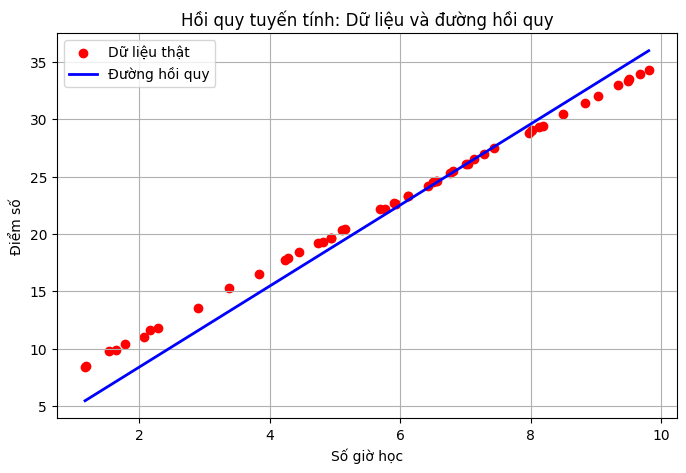

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Đặt seed cho NumPy để dữ liệu tái lập được
np.random.seed(0)

# 1. Sinh dữ liệu giả lập
num_samples = 50
# x: số giờ học ngẫu nhiên trong khoảng [1, 10]
x_np = np.random.uniform(1, 10, num_samples)
# Sinh nhiễu nhỏ (noise) với độ lệch chuẩn 0.1
noise = np.random.normal(0, 0.1, num_samples)
# Công thức tính y: y = 3x + 5 + noise
y_np = 3 * x_np + 5 + noise

# Chuyển dữ liệu sang dạng tensor và chuyển thành vector cột
x_tensor = torch.tensor(x_np, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_np, dtype=torch.float32).unsqueeze(1)

# 2. Khởi tạo tham số w và b ngẫu nhiên với requires_grad=True
w = torch.randn(1, requires_grad=True, dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)

# Thiết lập learning rate và số vòng lặp (epochs)
alpha = 0.01
num_epochs = 100
loss_history = []  # Lưu lại giá trị loss ở mỗi epoch

# Danh sách lưu kết quả huấn luyện cho bảng output
metrics = []

# 3. Huấn luyện mô hình bằng gradient descent
for epoch in range(num_epochs):
    # Tính giá trị dự đoán: y_pred = w*x + b
    y_pred = w * x_tensor + b
    # Tính hàm mất mát (Mean Squared Error - MSE)
    loss = torch.mean((y_pred - y_tensor) ** 2)
    loss_history.append(loss.item())

    # Ghi lại các thông số hiện tại của mô hình
    metrics.append({
        "Epoch": epoch,
        "Loss": loss.item(),
        "w": w.item(),
        "b": b.item()
    })

    # Reset gradient của các tham số trước khi tính mới
    if w.grad is not None:
        w.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()

    # Tính gradient của loss đối với w và b
    loss.backward()

    # Cập nhật các tham số theo gradient descent
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

# 4. Tạo bảng output bằng pandas
df_metrics = pd.DataFrame(metrics)
# In bảng kết quả; bạn có thể hiển thị toàn bộ bảng hoặc lọc ra các epoch cách đều ví dụ mỗi 10 epoch
display(df_metrics.iloc[::10, :])  # in mỗi 10 epoch

# 5. Biểu đồ đường hội tụ của hàm mất mát theo epoch
plt.figure(figsize=(8, 5))
plt.plot(loss_history, marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Quá trình hội tụ của mô hình")
plt.grid(True)
plt.show()

# 6. Biểu đồ scatter dữ liệu và đường hồi quy sau huấn luyện
# Tính giá trị dự đoán sau khi huấn luyện
y_pred_final = (w * x_tensor + b).detach().numpy()

plt.figure(figsize=(8, 5))
plt.scatter(x_np, y_np, label="Dữ liệu thật", color="red")
# Sắp xếp x_np để vẽ đường hồi quy mượt mà
sorted_indices = np.argsort(x_np)
x_sorted = x_np[sorted_indices]
y_line = (w.item() * x_sorted + b.item())
plt.plot(x_sorted, y_line, label="Đường hồi quy", color="blue", linewidth=2)
plt.xlabel("Số giờ học")
plt.ylabel("Điểm số")
plt.title("Hồi quy tuyến tính: Dữ liệu và đường hồi quy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Pytorch with tensor
import torch
import numpy as np
torch.__version__

'2.5.1+cu124'

In [17]:
import numpy as np
import torch

# Tạo một mảng NumPy gồm các số nguyên
arr = np.array([1, 2, 3, 4, 5])
print("Mảng NumPy:")
print(arr)

# In ra kiểu dữ liệu của mảng NumPy
print("\nKiểu dữ liệu của arr:", arr.dtype)

# In ra loại đối tượng của arr
print("Loại đối tượng của arr:", type(arr))

# Chuyển đổi mảng NumPy sang tensor của PyTorch
x = torch.from_numpy(arr)
print("\nTensor PyTorch:")
print(x)

# In ra kiểu dữ liệu của tensor x
print("\nKiểu dữ liệu của tensor x:", x.dtype)

# In ra loại đối tượng của x
print("Loại đối tượng của tensor x:", type(x))


Mảng NumPy:
[1 2 3 4 5]

Kiểu dữ liệu của arr: int64
Loại đối tượng của arr: <class 'numpy.ndarray'>

Tensor PyTorch:
tensor([1, 2, 3, 4, 5])

Kiểu dữ liệu của tensor x: torch.int64
Loại đối tượng của tensor x: <class 'torch.Tensor'>


In [18]:
import numpy as np
import torch

# Tạo mảng NumPy gồm các số từ 0 đến 11 và reshape thành ma trận 4x3
arr2 = np.arange(12).reshape(4, 3)
print("Mảng NumPy arr2:")
print(arr2)

# Chuyển đổi mảng NumPy thành tensor PyTorch
x2 = torch.from_numpy(arr2)
print("\nTensor PyTorch x2:")
print(x2)

# In ra kiểu của tensor x2
print("\nKiểu của x2:")
print(type(x2))


Mảng NumPy arr2:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

Tensor PyTorch x2:
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

Kiểu của x2:
<class 'torch.Tensor'>


Copying and sharing

In [19]:
import numpy as np
import torch

# Tạo một mảng NumPy với các giá trị từ 0 đến 4
arr = np.arange(0, 5)
# Chuyển đổi mảng NumPy thành tensor PyTorch
x = torch.from_numpy(arr)

# In tensor ban đầu
print("Tensor ban đầu:")
print(x)  # Kết quả: tensor([0, 1, 2, 3, 4])

# Thay đổi giá trị của phần tử đầu tiên trong mảng NumPy
arr[0] = 99

# In tensor sau khi mảng NumPy thay đổi
print("\nTensor sau khi thay đổi mảng NumPy:")
print(x)  # Kết quả: tensor([99, 1, 2, 3, 4])


Tensor ban đầu:
tensor([0, 1, 2, 3, 4])

Tensor sau khi thay đổi mảng NumPy:
tensor([99,  1,  2,  3,  4])




---
# **BTVN3: Giải thích 2 trường hợp ở trên**


> Chia sẻ vùng nhớ:
Hàm torch.from_numpy(arr) tạo ra một tensor mà sử dụng trực tiếp vùng nhớ của arr. Do đó, khi thay đổi giá trị trong arr, các thay đổi này sẽ được hiển thị ngay trong tensor.



>Ví dụ minh họa:
Trong đoạn code tạo mảng NumPy arr với các giá trị từ 0 đến 4, chuyển sang tensor x. Sau đó, khi thay đổi arr[0] thành 99, tensor x cũng tự động hiển thị giá trị mới vì chúng cùng trỏ đến cùng một vùng nhớ.






In [ ]:
# BTVN4: Tạo tensor bằng cách sử dụng các hàm khác nhau
import torch

# 1. Tạo tensor rỗng (empty) với kích thước 2x3 (giá trị không xác định)
empty_tensor = torch.empty(2, 3)
print("Empty Tensor (2x3):")
print(empty_tensor)
print()

# 2. Tạo tensor toàn số 0 với kích thước 2x3
zeros_tensor = torch.zeros(2, 3)
print("Zeros Tensor (2x3):")
print(zeros_tensor)
print()

# 3. Tạo tensor toàn số 1 với kích thước 2x3
ones_tensor = torch.ones(2, 3)
print("Ones Tensor (2x3):")
print(ones_tensor)
print()

# 4. Tạo tensor với các giá trị ngẫu nhiên từ phân phối đều trong khoảng [0, 1)
random_tensor = torch.rand(2, 3)
print("Random Tensor (2x3):")
print(random_tensor)
print()

# Sử dụng view để thay đổi kích thước tensor:
# Chẳng hạn, reshape ones_tensor từ kích thước (2,3) thành (3,2)
reshaped_tensor_view = ones_tensor.view(3, 2)
print("Reshaped Ones Tensor using view (3x2):")
print(reshaped_tensor_view)
print()

# Sử dụng view_as để reshape tensor theo kích thước của một tensor khác:
# Ví dụ: reshape random_tensor (2x3) thành cùng kích thước của một tensor tham chiếu có kích thước (3,2)
reference_tensor = torch.zeros(3, 2)
reshaped_tensor_view_as = random_tensor.view_as(reference_tensor)
print("Random Tensor reshaped using view_as (matching shape of reference tensor 3x2):")
print(reshaped_tensor_view_as)


Empty Tensor (2x3):
tensor([[1.1281e-30, 0.0000e+00, 7.7593e-31],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

Zeros Tensor (2x3):
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones Tensor (2x3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random Tensor (2x3):
tensor([[0.4223, 0.2182, 0.7050],
        [0.7312, 0.4599, 0.3924]])

Reshaped Ones Tensor using view (3x2):
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Random Tensor reshaped using view_as (matching shape of reference tensor 3x2):
tensor([[0.4223, 0.2182],
        [0.7050, 0.7312],
        [0.4599, 0.3924]])
